# Day 08. Exercise 05
# Clustering

## 0. Imports

In [162]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [163]:
df = pd.read_csv('../data/regression.csv')

In [164]:
df = df.drop(columns=['pageviews'])

In [165]:
# Выбор числовых столбцов для кластеризации
df_numeric = df.select_dtypes(include=['float64', 'int64'])

## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [166]:
# Создаем кластеры с использованием KMeans
kmeans = KMeans(n_clusters=3, random_state=21, n_init=10)
df_numeric['cluster'] = kmeans.fit_predict(df_numeric[['num_commits', 'AVG(diff)']])

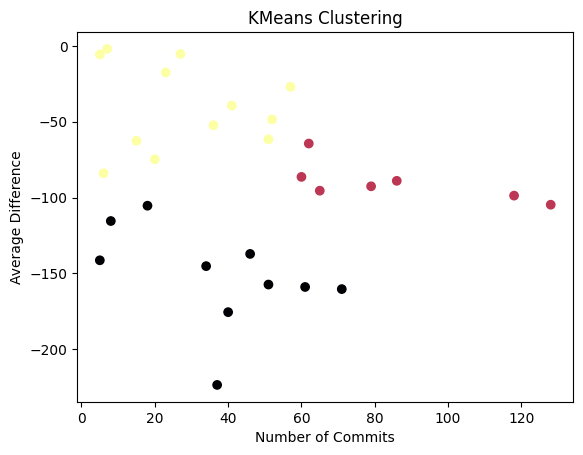

In [167]:
# Визуализируем данные на scatter plot
plt.scatter(df_numeric['num_commits'], df_numeric['AVG(diff)'], c=df_numeric['cluster'], cmap='inferno')
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
plt.title('KMeans Clustering')
plt.show()

In [168]:
# Считаем silhouette_score
score = silhouette_score(df_numeric[['num_commits', 'AVG(diff)']], df_numeric['cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.43901709571532954


In [169]:
# Попробуем разные значения n_clusters
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=21, n_init=10)
    df_numeric['cluster'] = kmeans.fit_predict(df_numeric[['num_commits', 'AVG(diff)']])
    score = silhouette_score(df_numeric[['num_commits', 'AVG(diff)']], df_numeric['cluster'])
    print(f'Silhouette Score for n_clusters={n_clusters}: {score}')

Silhouette Score for n_clusters=2: 0.41787451607810133
Silhouette Score for n_clusters=3: 0.43901709571532954
Silhouette Score for n_clusters=4: 0.44414602561947886
Silhouette Score for n_clusters=5: 0.4760630149229996
Silhouette Score for n_clusters=6: 0.44572484120013867
Silhouette Score for n_clusters=7: 0.4964107297576806
Silhouette Score for n_clusters=8: 0.50779855565622
Silhouette Score for n_clusters=9: 0.47576869039147557


## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [170]:
# Создаем кластеры с использованием DBSCAN
dbscan = DBSCAN(eps=20, min_samples=2)
df_numeric['cluster'] = dbscan.fit_predict(df_numeric[['num_commits', 'AVG(diff)']])

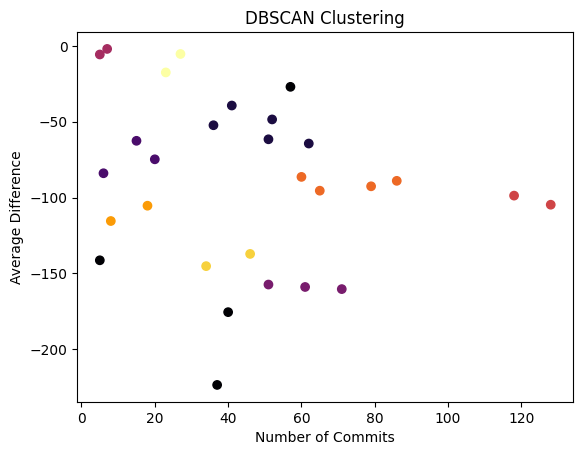

In [171]:
# Визуализируем данные на scatter plot
plt.scatter(df_numeric['num_commits'], df_numeric['AVG(diff)'], c=df_numeric['cluster'], cmap='inferno')
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
plt.title('DBSCAN Clustering')
plt.show()

In [172]:
# Подсчет silhouette_score
if len(set(df_numeric['cluster'])) > 1:
    score = silhouette_score(df_numeric[['num_commits', 'AVG(diff)']], df_numeric['cluster'])
    print(f'Silhouette Score: {score}')
else:
    print('Not enough clusters found for silhouette score calculation.')

Silhouette Score: 0.38339641455696616


In [173]:
# Попробуем разные значения eps и min_samples
for eps in range(10, 50, 2):
    dbscan = DBSCAN(eps=eps, min_samples=2)
    df_numeric['cluster'] = dbscan.fit_predict(df_numeric[['num_commits', 'AVG(diff)']])
    if len(set(df_numeric['cluster'])) > 1:
        score = silhouette_score(df_numeric[['num_commits', 'AVG(diff)']], df_numeric['cluster'])
        print(f'Silhouette Score for eps={eps}: {score}')
    else:
        print(f'Not enough clusters found for eps={eps}.')

for min_samples in range(2, 10):
    dbscan = DBSCAN(eps=20, min_samples=min_samples)
    df_numeric['cluster'] = dbscan.fit_predict(df_numeric[['num_commits', 'AVG(diff)']])
    if len(set(df_numeric['cluster'])) > 1:
        score = silhouette_score(df_numeric[['num_commits', 'AVG(diff)']], df_numeric['cluster'])
        print(f'Silhouette Score for min_samples={min_samples}: {score}')
    else:
        print(f'Not enough clusters found for min_samples={min_samples}.')

Silhouette Score for eps=10: -0.07923479818777455
Silhouette Score for eps=12: 0.04588444532530316
Silhouette Score for eps=14: 0.25200359787098187
Silhouette Score for eps=16: 0.3469844857581226
Silhouette Score for eps=18: 0.38339641455696616
Silhouette Score for eps=20: 0.38339641455696616
Silhouette Score for eps=22: 0.4794129092034348
Silhouette Score for eps=24: 0.3373231449127411
Silhouette Score for eps=26: 0.34388947016930727
Silhouette Score for eps=28: 0.34247595585427343
Silhouette Score for eps=30: 0.19881722125199422
Silhouette Score for eps=32: 0.19881722125199422
Silhouette Score for eps=34: 0.3659855186711519
Silhouette Score for eps=36: 0.3659855186711519
Silhouette Score for eps=38: 0.3659855186711519
Silhouette Score for eps=40: 0.3659855186711519
Silhouette Score for eps=42: 0.3659855186711519
Silhouette Score for eps=44: 0.3659855186711519
Silhouette Score for eps=46: 0.3659855186711519
Silhouette Score for eps=48: 0.3659855186711519
Silhouette Score for min_sampl

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [174]:
# Создаем кластеры с использованием иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=5)
df_numeric['cluster'] = agg_clustering.fit_predict(df_numeric[['num_commits', 'AVG(diff)']])

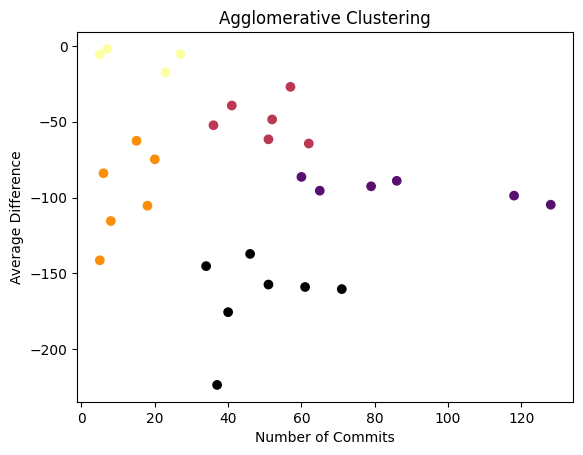

In [175]:
# Визуализируем данные на scatter plot
plt.scatter(df_numeric['num_commits'], df_numeric['AVG(diff)'], c=df_numeric['cluster'], cmap='inferno')
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
plt.title('Agglomerative Clustering')
plt.show()

In [176]:
# Считаем silhouette_score
score = silhouette_score(df_numeric[['num_commits', 'AVG(diff)']], df_numeric['cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.46383015199381467


In [177]:
# Попробуем разные значения n_clusters
for n_clusters in range(2, 10):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    df_numeric['cluster'] = agg_clustering.fit_predict(df_numeric[['num_commits', 'AVG(diff)']])
    score = silhouette_score(df_numeric[['num_commits', 'AVG(diff)']], df_numeric['cluster'])
    print(f'Silhouette Score for n_clusters={n_clusters}: {score}')

Silhouette Score for n_clusters=2: 0.35902490572221984
Silhouette Score for n_clusters=3: 0.3390493703444805
Silhouette Score for n_clusters=4: 0.4448362750283643
Silhouette Score for n_clusters=5: 0.46383015199381467
Silhouette Score for n_clusters=6: 0.4527145606287827
Silhouette Score for n_clusters=7: 0.4865808853184314
Silhouette Score for n_clusters=8: 0.50779855565622
Silhouette Score for n_clusters=9: 0.47576869039147557


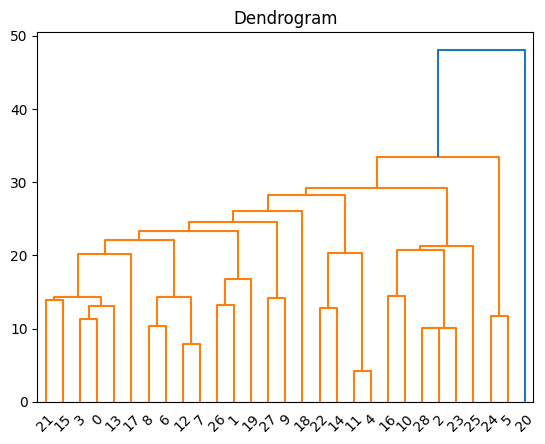

In [178]:
# Визуализируем дендрограмму
linked = linkage(df_numeric[['num_commits', 'AVG(diff)']], 'single')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [179]:
def optimize_clustering(model_class, params, param_name, param_range):
    scores = []
    best_score = -1
    best_param = None

    for param_value in param_range:
        params[param_name] = param_value
        model = model_class(**params)
        df_numeric['cluster'] = model.fit_predict(df_numeric[['num_commits', 'AVG(diff)']])
        if len(set(df_numeric['cluster'])) > 1:
            score = silhouette_score(df_numeric[['num_commits', 'AVG(diff)']], df_numeric['cluster'])
            scores.append(score)

            if score > best_score:
                best_score = score
                best_param = param_value
        else:
            scores.append(None)

    # Визуализация изменения silhouette_score в зависимости от значения параметра
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(param_range, scores, marker='o')
    plt.xlabel(param_name)
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score vs {param_name}')

    # Визуализация данных на scatter plot с использованием лучшего значения параметра
    plt.subplot(1, 2, 2)
    params[param_name] = best_param
    best_model = model_class(**params)
    df_numeric['cluster'] = best_model.fit_predict(df_numeric[['num_commits', 'AVG(diff)']])
    plt.scatter(df_numeric['num_commits'], df_numeric['AVG(diff)'], c=df_numeric['cluster'], cmap='viridis')
    plt.xlabel('Number of Commits')
    plt.ylabel('Average Difference')
    plt.title(f'Best {model_class.__name__} Clustering')

    plt.show()

    return best_param, best_score

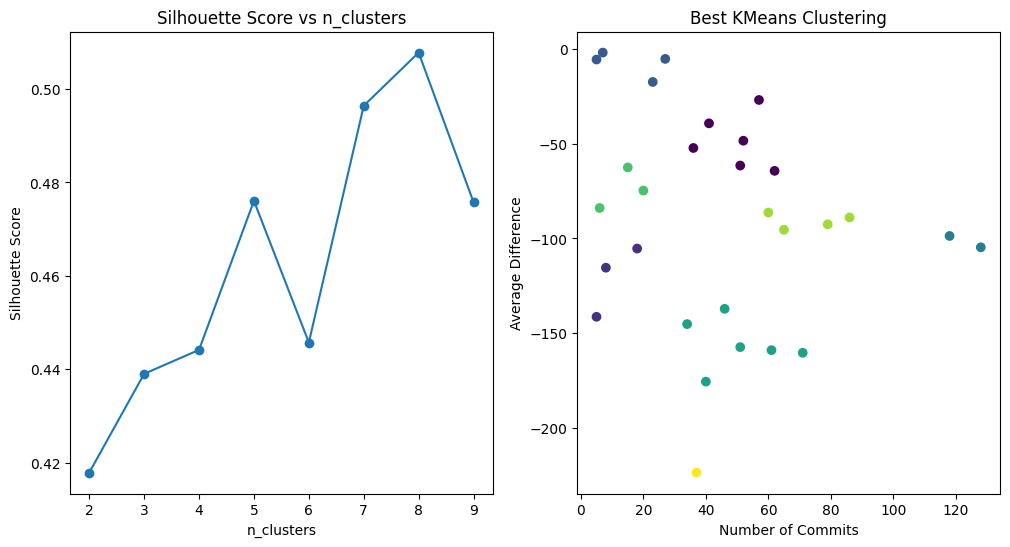

Best n_clusters for KMeans: 8, Best Silhouette Score: 0.50779855565622


In [180]:
# Пример использования функции для KMeans
best_n_clusters, best_score_kmeans = optimize_clustering(KMeans, {'random_state': 21, 'n_init': 10}, 'n_clusters', range(2, 10))
print(f'Best n_clusters for KMeans: {best_n_clusters}, Best Silhouette Score: {best_score_kmeans}')

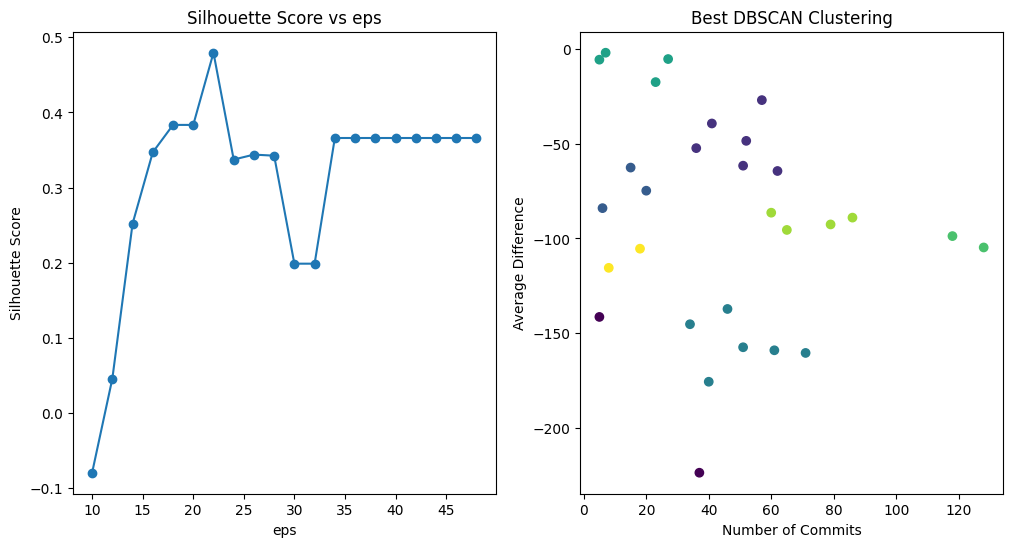

Best eps for DBSCAN: 22, Best Silhouette Score: 0.4794129092034348


In [181]:
# Пример использования функции для DBSCAN (eps)
best_eps, best_score_dbscan_eps = optimize_clustering(DBSCAN, {'min_samples': 2}, 'eps', range(10, 50, 2))
print(f'Best eps for DBSCAN: {best_eps}, Best Silhouette Score: {best_score_dbscan_eps}')

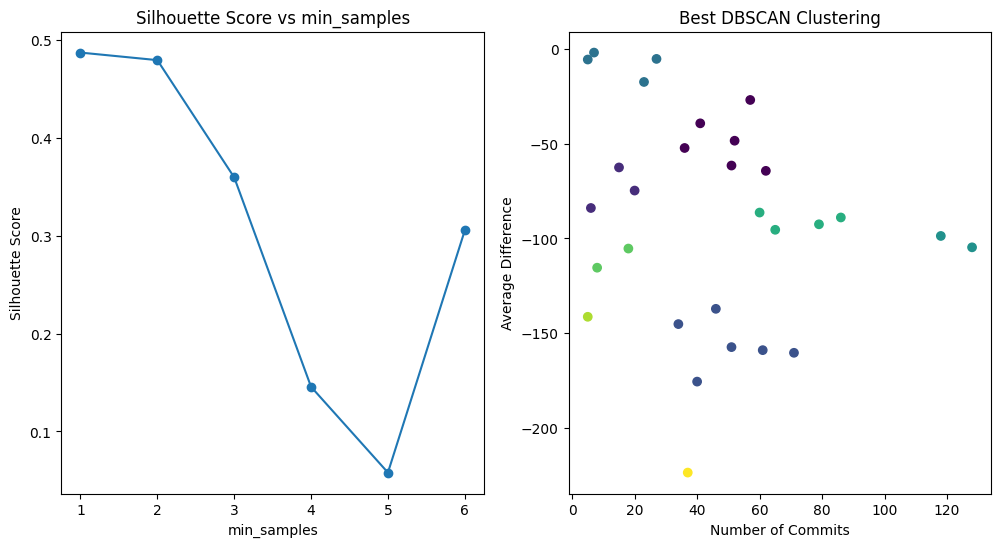

Best min_samples for DBSCAN: 1, Best Silhouette Score: 0.48713041554757475


In [182]:
# Пример использования функции для DBSCAN (min_samples)
best_min_samples, best_score_dbscan_min_samples = optimize_clustering(DBSCAN, {'eps': best_eps}, 'min_samples', range(1, 10))
print(f'Best min_samples for DBSCAN: {best_min_samples}, Best Silhouette Score: {best_score_dbscan_min_samples}')

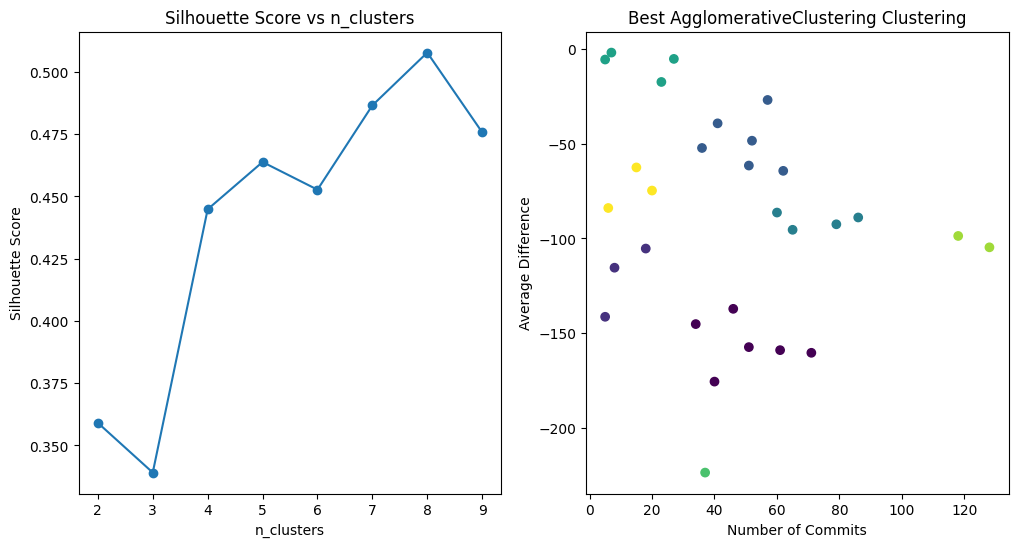

Best n_clusters for AgglomerativeClustering: 8, Best Silhouette Score: 0.50779855565622


In [183]:
# Пример использования функции для AgglomerativeClustering (n_clusters)
best_n_clusters_agg, best_score_agg = optimize_clustering(AgglomerativeClustering, {}, 'n_clusters', range(2, 10))
print(f'Best n_clusters for AgglomerativeClustering: {best_n_clusters_agg}, Best Silhouette Score: {best_score_agg}')